In [1]:
import numpy
from matplotlib import pyplot
from scipy.interpolate import CubicSpline

In [2]:
x = numpy.array([0,1,2,2.5,3,4])
y = numpy.array([1.4,0.6,1.0,0.65,0.6,1.0])
h = numpy.zeros(len(x)-1)
for i in range(len(x)-1):
    h[i]= x[i+1]-x[i]
    
print h

[ 1.   1.   0.5  0.5  1. ]


In [3]:
R = numpy.zeros(len(x)-2) 

for i in range(len(R)+1):
    if i>0:
        R[i-1]=6*(((y[i+1]-y[i])/h[i])-((y[i]-y[i-1])/h[i-1]))


In [4]:
print R

[ 7.2 -6.6  3.6  3. ]


In [5]:
A = numpy.zeros((4,4))

In [6]:
A[0,0]=6
A[3,3]=6
A[3,2]=-1.5
A[1,:]=([1,3,0.5,0])
A[2,:]=([0,0.5,2,0.5])

In [7]:
print A

[[ 6.   0.   0.   0. ]
 [ 1.   3.   0.5  0. ]
 [ 0.   0.5  2.   0.5]
 [ 0.   0.  -1.5  6. ]]


In [8]:
variables = numpy.linalg.solve(A, R)

In [9]:
print variables

[ 1.2        -2.97959184  2.27755102  1.06938776]


In [10]:
variables=numpy.insert(variables,0,5.37959184)

In [11]:
print variables

[ 5.37959184  1.2        -2.97959184  2.27755102  1.06938776]


In [12]:
variables=numpy.append(variables,-1.34281)

In [13]:
print variables

[ 5.37959184  1.2        -2.97959184  2.27755102  1.06938776 -1.34281   ]


In [16]:
d = y
b = variables/2
a = numpy.zeros(len(x))
for i in range(len(a)-1):
    a[i]=(variables[i+1]-variables[i])/(6*h[i])
c = numpy.zeros(len(x))
for i in range(len(c)-1):
    c[i]=(d[i+1]-d[i])/(h[i])-(2*variables[i]+variables[i+1])*h[i]/6

In [17]:
print a
print b
print c
print d

[-0.69659864 -0.69659864  1.75238095 -0.40272109 -0.40203296  0.        ]
[ 2.68979592  0.6        -1.48979592  1.13877551  0.53469388 -0.671405  ]
[-2.79319728  0.49659864 -0.39319728 -0.56870748  0.26733908  0.        ]
[ 1.4   0.6   1.    0.65  0.6   1.  ]


In [18]:
def polynomial(X,x,a,b,c,d):
    p=0
    if 0<=X<1:
        i=0
        p = d[i]+c[i]*(X-x[i])+b[i]*(X-x[i])**2+a[i]*(X-x[i])**3
    if 1<=X<2:
        i=1
        p = d[i]+c[i]*(X-x[i])+b[i]*(X-x[i])**2+a[i]*(X-x[i])**3
    if 2<=X<2.5:
        i=2
        p = d[i]+c[i]*(X-x[i])+b[i]*(X-x[i])**2+a[i]*(X-x[i])**3
    if 2.5<=X<3:
        i=3
        p = d[i]+c[i]*(X-x[i])+b[i]*(X-x[i])**2+a[i]*(X-x[i])**3
    if 3<=X<4:
        i=4
        p = d[i]+c[i]*(X-x[i])+b[i]*(X-x[i])**2+a[i]*(X-x[i])**3
    if X==4:
        p=1
    
    return p
    


In [19]:
l = numpy.linspace(0,4,201)
q = numpy.zeros(len(l))
for i in range(len(l)):
    q[i] = polynomial(l[i],x,a,b,c,d)
    

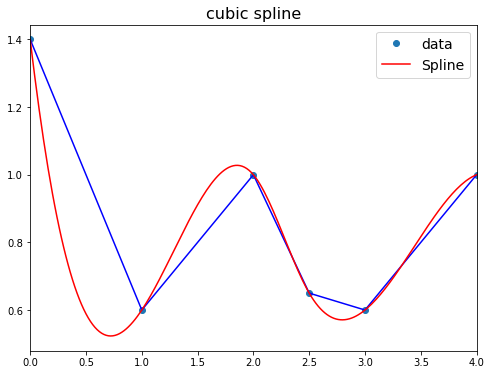

In [23]:
%matplotlib inline


pyplot.figure(figsize=(8, 6))
pyplot.plot(x, y, 'o', label='data')
pyplot.plot(x, y,color='b')
pyplot.plot(l,q,color='r', label="Spline")
pyplot.xlim(0,4)
pyplot.legend(loc='best', prop={'size':14})
pyplot.title('cubic spline', fontsize=16)

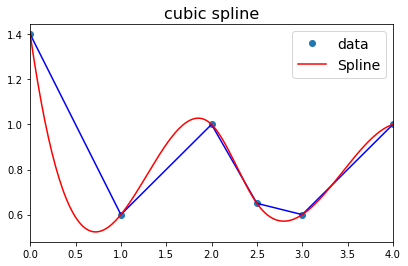

In [20]:
%matplotlib inline
cs = CubicSpline(x, y)
xs = numpy.linspace(0,4,201)
pyplot.figure(figsize=(6.5, 4))
pyplot.plot(x, y, 'o', label='data')
pyplot.plot(x, y,color='b')
pyplot.plot(xs, cs(xs),color='r', label="Spline")
pyplot.xlim(0,4)
pyplot.legend(loc='best', prop={'size':14})
pyplot.title('cubic spline', fontsize=16)